In [7]:
from pathlib import Path
import sys

sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt
from utils.coba_dataset import COBA
import numpy as np
from typing import Dict, List

In [2]:
coba_dataset: COBA = COBA(root="../data/coba", download=False)

In [3]:
coba_dataset.class_to_idx

{0: 'airplane',
 1: 'ambulance',
 2: 'briefcase',
 3: 'cannon',
 4: 'car',
 5: 'civilian',
 6: 'dagger',
 7: 'dog',
 8: 'handgun',
 9: 'missilerocket',
 10: 'rifle',
 11: 'soldier',
 12: 'tank',
 13: 'truck'}

In [4]:
class_map: Dict[int, str] = coba_dataset.class_to_idx
classes_as_ints: List[int] = [label.argmax().item() for _, label in coba_dataset]

# for img,label in coba_dataset:
#     class_index:int = label.argmax().item()
#     classes_as_ints.append(class_index)
# print(class_map[class_index])
# plt.imshow(img)

class_indices, class_counts = np.unique(classes_as_ints, return_counts=True)

coba_class_counts: Dict[str, int] = {
    class_map[class_index]: class_count
    for class_index, class_count in zip(class_indices, class_counts)
}

coba_class_counts

{'airplane': 592,
 'ambulance': 265,
 'briefcase': 175,
 'cannon': 293,
 'car': 1031,
 'civilian': 2748,
 'dagger': 199,
 'dog': 619,
 'handgun': 283,
 'missilerocket': 266,
 'rifle': 587,
 'soldier': 640,
 'tank': 395,
 'truck': 715}

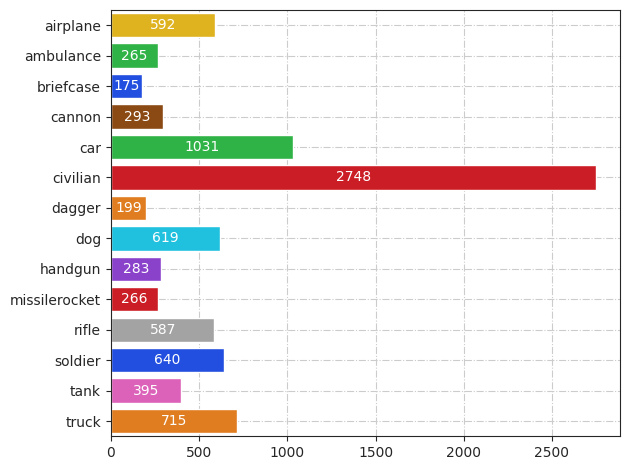

In [5]:
x = [class_map[class_index] for class_index in class_indices]
y = class_counts
sns.set_style("ticks", {"grid.linestyle": "-."})
palette = sns.color_palette("bright", 14)

# _, ax = plt.subplots(figsize=(5, 5))

barplot = sns.barplot(
    x=y,
    y=x,
    hue=y,
    orient="h",
    # palette=sns.color_palette("Spectral", 14),
    # palette=sns.color_palette("bright", 14),
    palette=palette,
    # palette=sns.color_palette("icefire", 14),
    # palette=sns.dark_palette("#69d", 14, reverse=True),
    # palette=sns.dark_palette("#69", 14, reverse=True),
    # palette=sns.diverging_palette(250, 3000,l=50, center="dark", as_cmap=True),
    legend=False,
    # fill=False,
    # ax=ax
)

# barplot.tick_params(labelsize=10)

for i, value in enumerate(coba_class_counts.values()):
    # ax.text(v, str(v), ha='center')
    # ax.text(x=50,y=5,s=value, ha="center")
    barplot.text(
        x=value / 2,
        y=i,
        s=value,
        va="center",
        ha="center",
        color="white",
        # size=12,
    )

plt.grid()
plt.tight_layout()
plt.show()

In [8]:
# Save to dir
fig = barplot.get_figure()

DATASET: str = "coba"

save_dir: Path = Path(Path.cwd(), DATASET)
save_dir.mkdir(exist_ok=True, parents=True)

fig.savefig(Path(save_dir, f"{DATASET}_data_dist.pdf"))